<a href="https://colab.research.google.com/github/aziz0519/Advanced-Data-Science-Capstone-Project/blob/master/Prediction_of_Airbnb_Prices_in_Singapore_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price prediction of affordable and accessible Airbnb properties in Singapore

### In this project, I will be creating a predictive model to predict the prices of AirBnb services in Singapore as of 27 Feb 2020. The dataset is obtained from the Airbnb website as below:
### http://data.insideairbnb.com/singapore/sg/singapore/2020-02-27/visualisations/listings.csv
 

## Week 1  : Exploratory Data Analysis of dataset

##### Obtain required dataset


In [1]:
!wget https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv

--2020-04-04 12:27:01--  https://raw.githubusercontent.com/aziz0519/Advanced-Data-Science-Capstone-Project/master/listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1188761 (1.1M) [text/plain]
Saving to: ‘listings.csv’

listings.csv        100%[===================>]   1.13M  --.-KB/s    in 0.08s   

2020-04-04 12:27:02 (14.5 MB/s) - ‘listings.csv’ saved [1188761/1188761]



#### Explore data and basic descriptive stats using Spark

In [2]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 60kB/s 
     |████████████████████████████████| 204kB 45.2MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=172b76984329518331964e568ae76e07ede6aa2c4c080c7fe4c848dc45062b88
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()

In [0]:
rdd = sc.textFile('listings.csv')
df = spark.read.csv(rdd,header=True)

In [5]:
df.createOrReplaceTempView('listings')
df.show()

+------+--------------------+-------+-------------+-------------------+-------------+--------+---------+------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|    id|                name|host_id|    host_name|neighbourhood_group|neighbourhood|latitude|longitude|   room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+------+--------------------+-------+-------------+-------------------+-------------+--------+---------+------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
| 49091|COZICOMFORT LONG ...| 266763|    Francesca|       North Region|    Woodlands| 1.44255| 103.7958|Private room|   84|           180|                1| 2013-10-21|             0.01|                             2|             365|
| 50646|Pleasant Room alo...| 227796|      Sujatha|     Cent

In [6]:
print(df.printSchema())

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: string (nullable = true)
 |-- availability_365: string (nullable = true)

None


In [0]:
df.registerTempTable("listings")

#### As I would want to do a thorough analysis on the dataset, I will revert to conventional Python libraries to the data exploration and extract meaningful insights from the data.

In [8]:
#Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
df_listings = pd.read_csv('listings.csv')

In [11]:
df_listings.shape

(8047, 16)

In [12]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8047 non-null   int64  
 1   name                            8045 non-null   object 
 2   host_id                         8047 non-null   int64  
 3   host_name                       8047 non-null   object 
 4   neighbourhood_group             8047 non-null   object 
 5   neighbourhood                   8047 non-null   object 
 6   latitude                        8047 non-null   float64
 7   longitude                       8047 non-null   float64
 8   room_type                       8047 non-null   object 
 9   price                           8047 non-null   int64  
 10  minimum_nights                  8047 non-null   int64  
 11  number_of_reviews               8047 non-null   int64  
 12  last_review                     51

In [13]:
df_listings.describe()

id  ...  availability_365
count  8.047000e+03  ...       8047.000000
mean   2.622832e+07  ...        220.874115
std    1.176525e+07  ...        147.731172
min    4.909100e+04  ...          0.000000
25%    1.686457e+07  ...         75.000000
50%    2.811631e+07  ...        297.000000
75%    3.672920e+07  ...        363.000000
max    4.257871e+07  ...        365.000000

[8 rows x 10 columns]

In [0]:
#import statistical libraries
from scipy import stats
from scipy.stats import norm,skew, boxcox_normmax

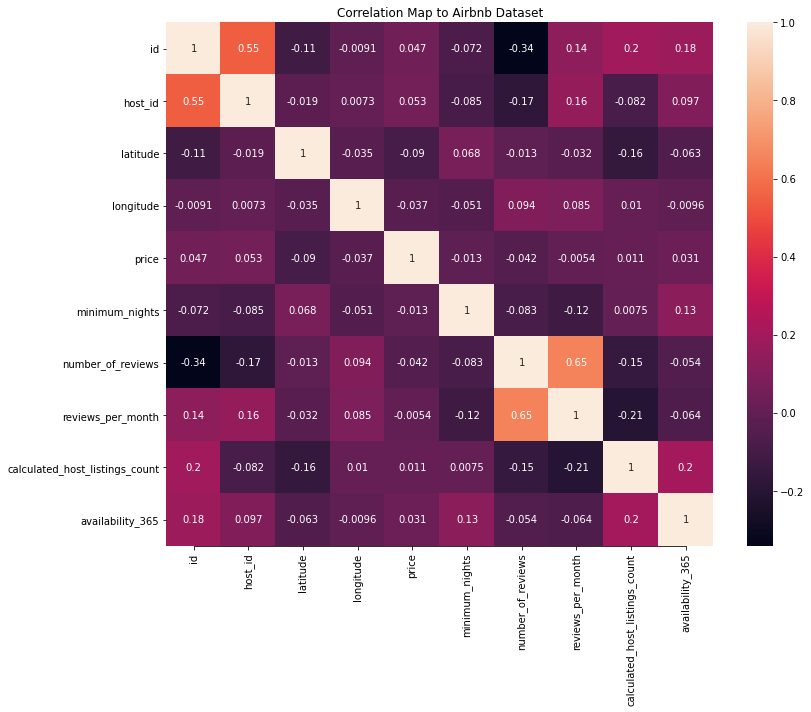

In [15]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map to Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()


 mu = 170.213371 and sigma = 320.309329



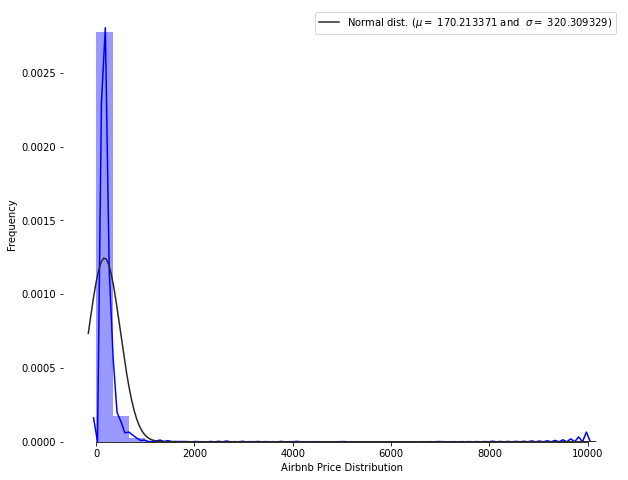

In [16]:
sns.set_palette('deep')
f,ax = plt.subplots(figsize=(10,8))
sns.distplot(df_listings['price'],fit=norm,color='b',bins=30)
(mu,sigma) = norm.fit(df_listings['price'])
print('\n mu = {:2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:2f} and  $\sigma=$ {:2f})'.format(mu, sigma)], loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Airbnb Price Distribution')
sns.despine(trim=True,left=True)
plt.show()


 mu = 13.762147 and sigma = 32.689875



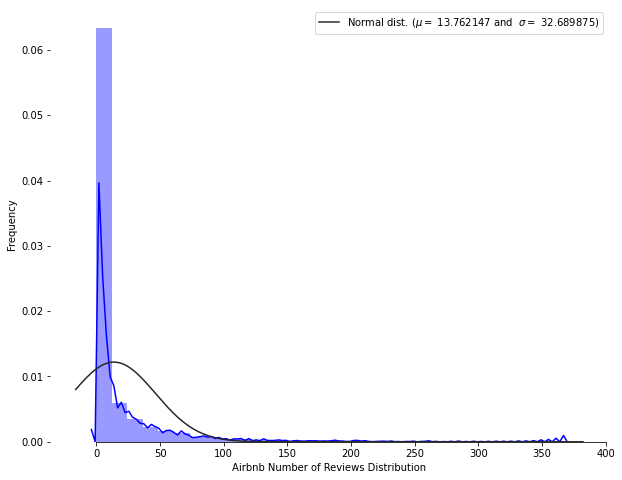

In [17]:
sns.set_palette('deep')
f,ax = plt.subplots(figsize=(10,8))
sns.distplot(df_listings['number_of_reviews'],fit=norm,color='b',bins=30)
(mu,sigma) = norm.fit(df_listings['number_of_reviews'])
print('\n mu = {:2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:2f} and  $\sigma=$ {:2f})'.format(mu, sigma)], loc='best')
ax.xaxis.grid(False)
ax.set(ylabel='Frequency')
ax.set(xlabel='Airbnb Number of Reviews Distribution')
sns.despine(trim=True,left=True)
plt.show()

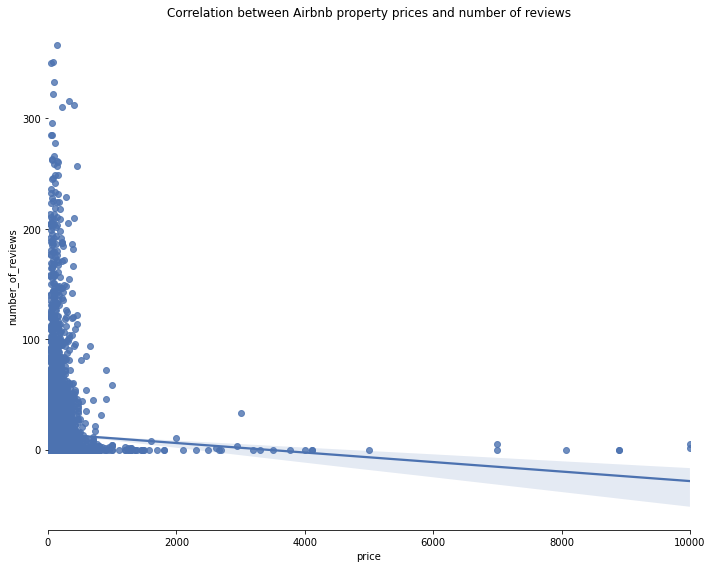

In [18]:
f, ax = plt.subplots(figsize=(10,8))
ax.xaxis.grid(False)
sns.regplot(x=df_listings['price'],y=df_listings['number_of_reviews'],fit_reg=True)
ax.set(title='Correlation between Airbnb property prices and number of reviews')
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

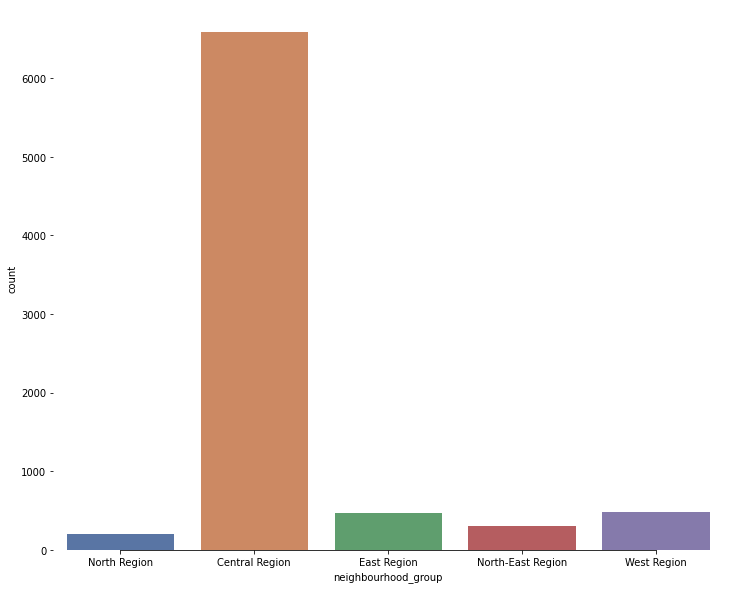

In [19]:
f, ax = plt.subplots(figsize=(12,10))
ax.xaxis.grid(False)
sns.countplot(df_listings['neighbourhood_group'])
sns.despine(trim=True,left=True)

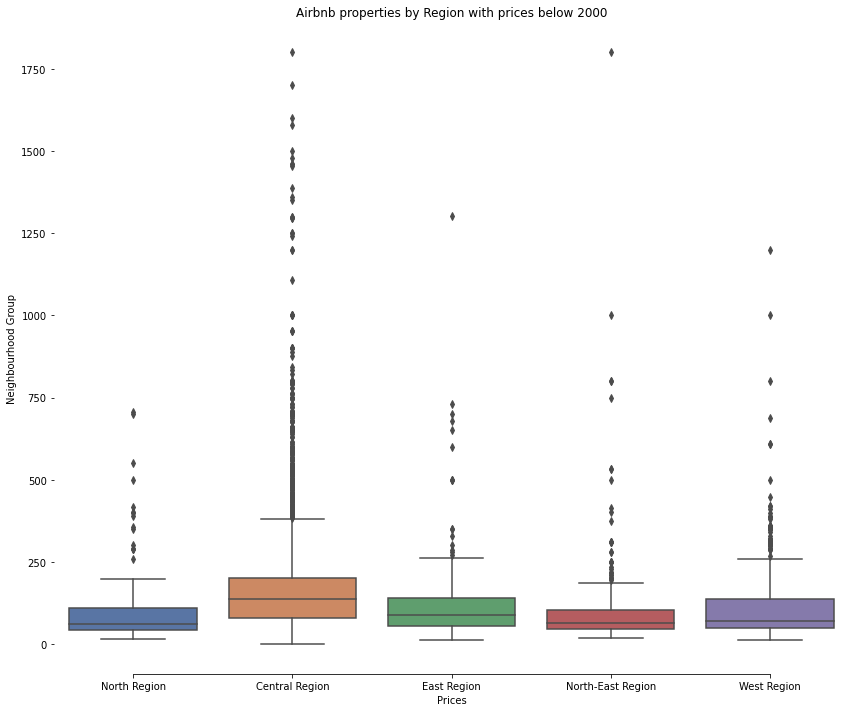

In [20]:
#Inspect distribuion of properties by regions and priced below 2000 SGD
prices_below2000 = df_listings[df_listings.price < 2000]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='price',x='neighbourhood_group',data=prices_below2000)
ax.xaxis.grid(False)
ax.set(ylabel='Neighbourhood Group')
ax.set(xlabel='Prices')
ax.set(title="Airbnb properties by Region with prices below 2000")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

#### Observe that most of the Airbnb properties are more expensive at the Central Region as compared to the other regions in Singapore

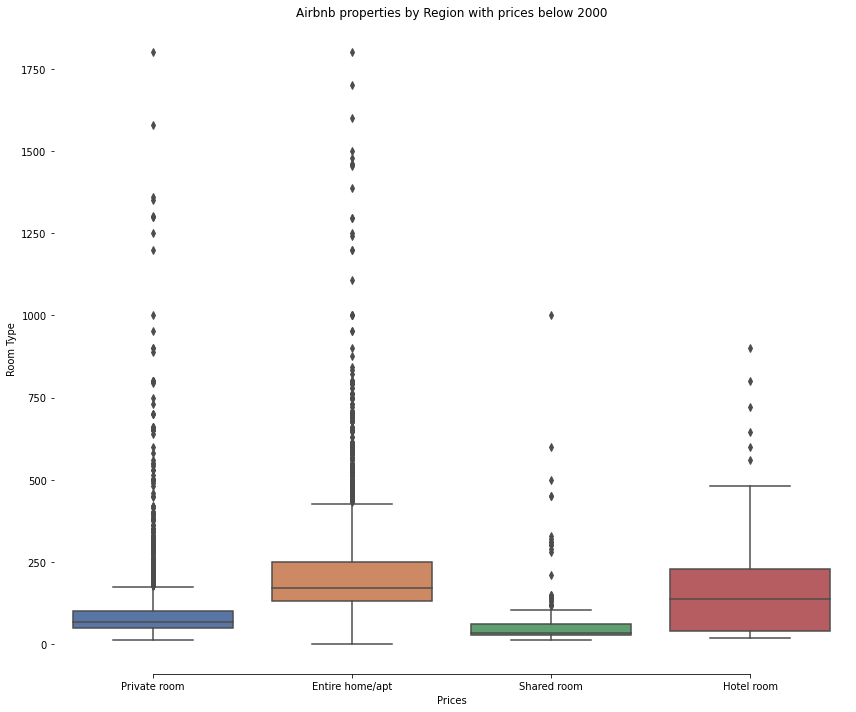

In [21]:
prices_below2000 = df_listings[df_listings.price < 2000]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='price',x='room_type',data=prices_below2000)
ax.xaxis.grid(False)
ax.set(ylabel='Room Type')
ax.set(xlabel='Prices')
ax.set(title="Airbnb properties by Region with prices below 2000")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

#### Typically, Private room and Entire home/apt are greater in demand and hence the prices are more expensive for these room types

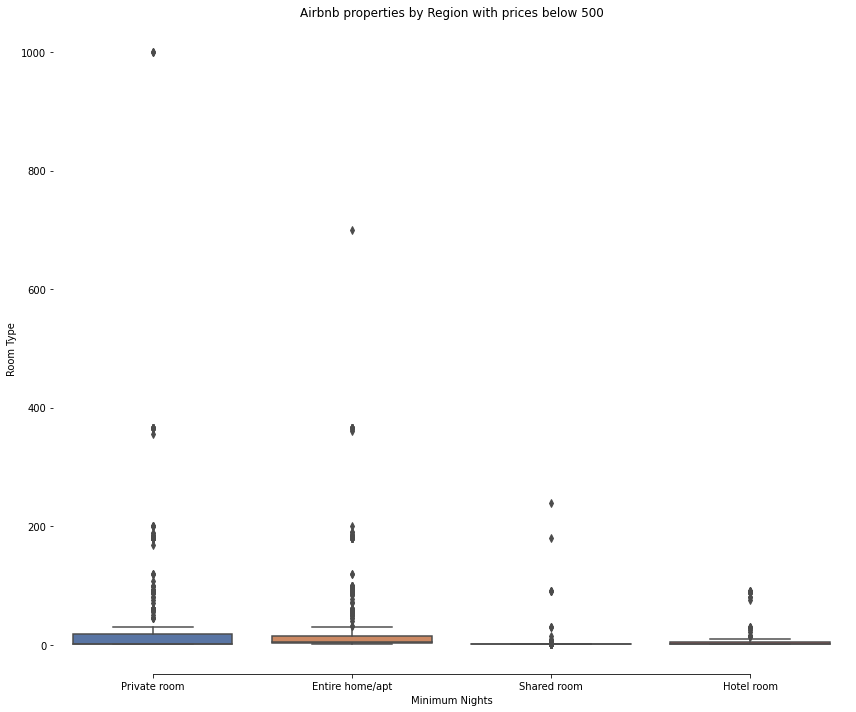

In [22]:
prices_below500 = df_listings[df_listings.price < 500]
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(y='minimum_nights',x='room_type',data=prices_below500)
ax.xaxis.grid(False)
ax.set(ylabel='Room Type')
ax.set(xlabel='Minimum Nights')
ax.set(title="Airbnb properties by Region with prices below 500")
sns.despine(trim=True,left=True)
plt.tight_layout()
plt.show()

### Now we can make use of the latitude and longitude values to perform a geospatial analysis of the Airbnb properties islandwide

In [0]:
# Import geospatial libraries
import folium 
from folium.plugins import MarkerCluster
import plotly.express as px

In [24]:
locations = df_listings[['latitude','longitude']]
locationlist = locations.values.tolist()
len(locationlist)

8047

In [0]:
#Identify locations of Airbnb properties on the Singapore Map
map = folium.Map(location=[1.44255,103.79580],tiles = 'Stamen Terrain',zoom_start=11)
marker_cluster1 = MarkerCluster().add_to(map)
for i in range(len(locationlist)):
  folium.Marker(locationlist[i]).add_to(marker_cluster1)

In [26]:
map

### From the map we can see that most of the properties are cluster near the central area of Singapore


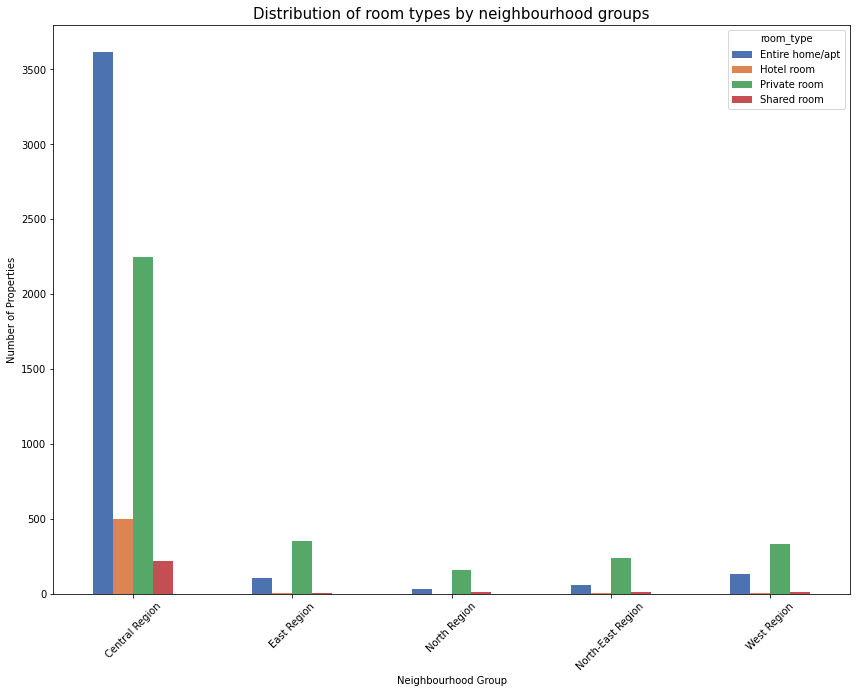

In [27]:
pd.crosstab(df_listings.neighbourhood_group,df_listings.room_type).plot(kind='bar',figsize=(12,10))
plt.title('Distribution of room types by neighbourhood groups',fontsize=15)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

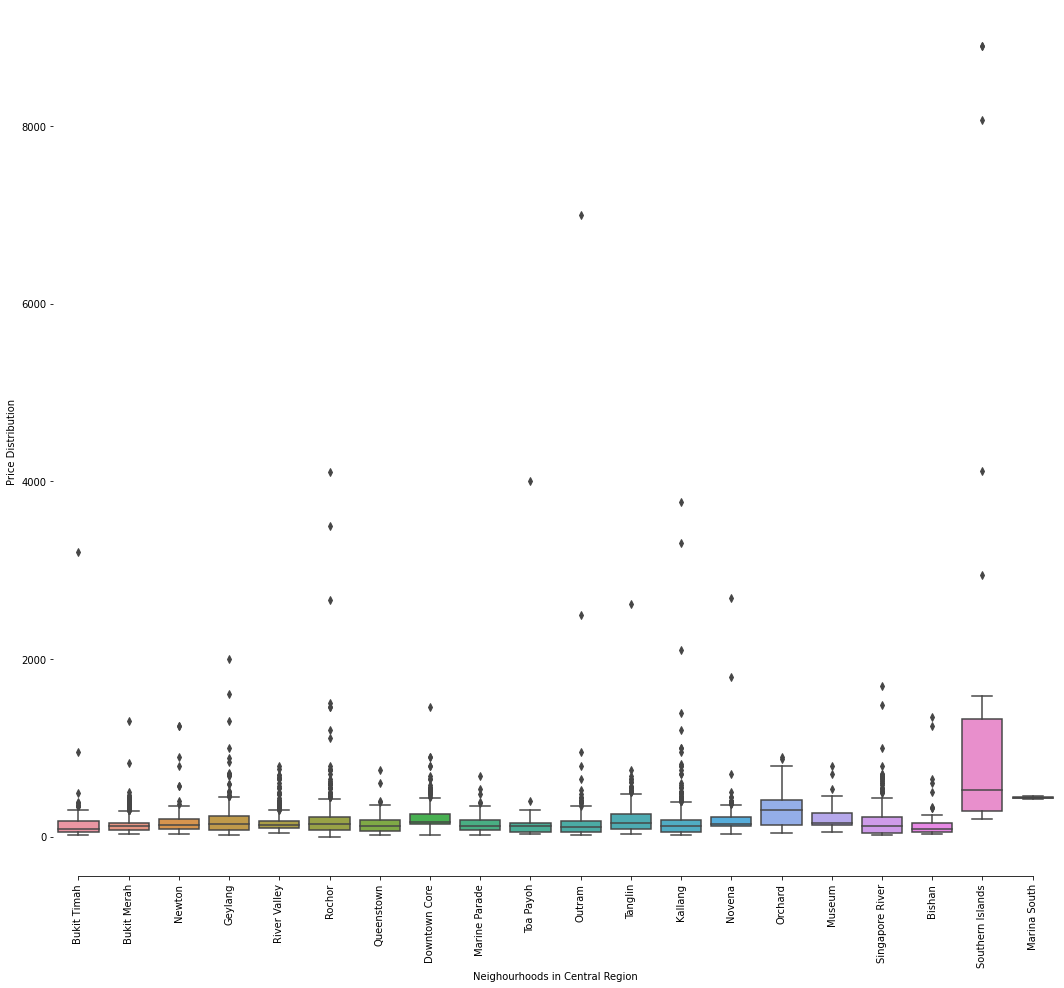

In [28]:
airbnb_central = df_listings[df_listings.neighbourhood_group == 'Central Region']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central)
ax.xaxis.grid(False)
ax.set(ylabel='Price Distribution')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

In [29]:
airbnb_central_eh = airbnb_central[airbnb_central.room_type == 'Entire home/apt']
central_locations_eh = airbnb_central_eh[['latitude','longitude']]
central_locations_ehlist = central_locations_eh.values.tolist()
len(central_locations_ehlist)

3615

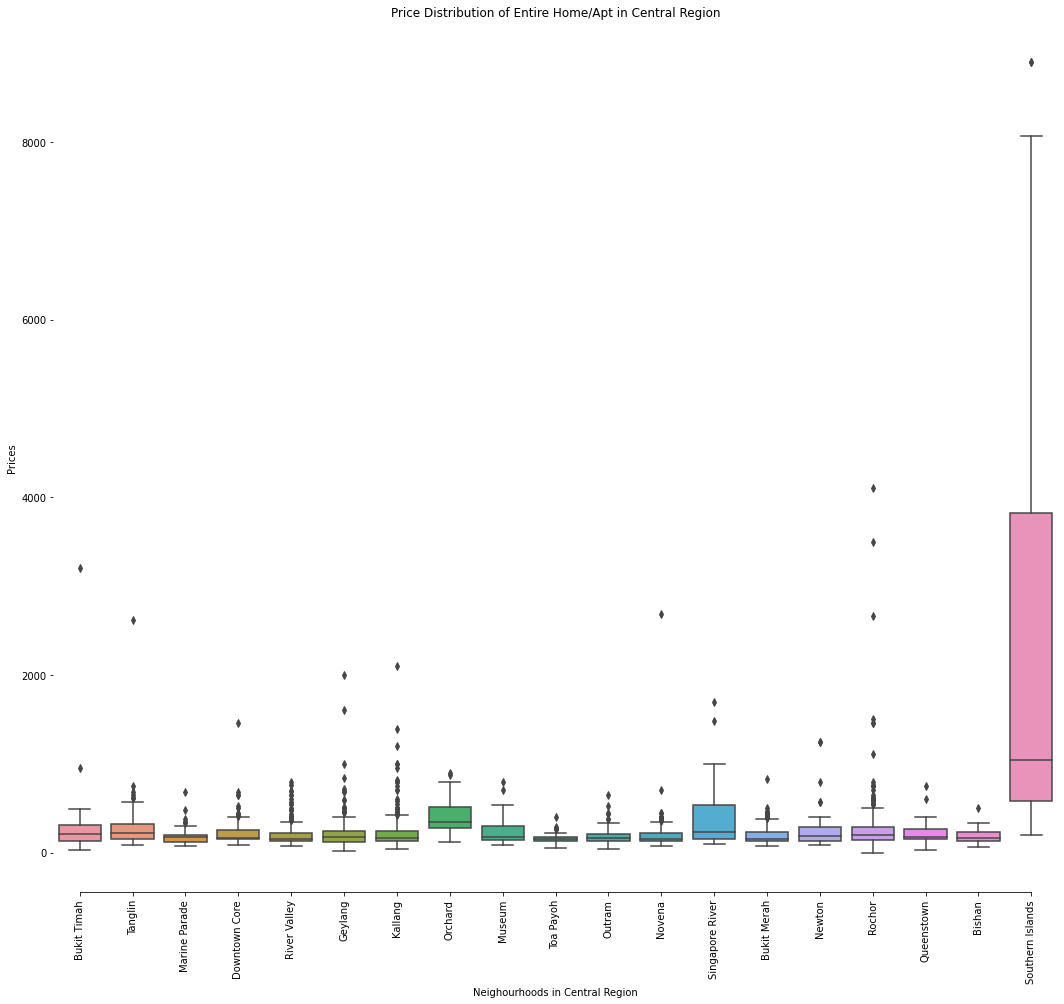

In [30]:
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_eh)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Entire Home/Apt in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

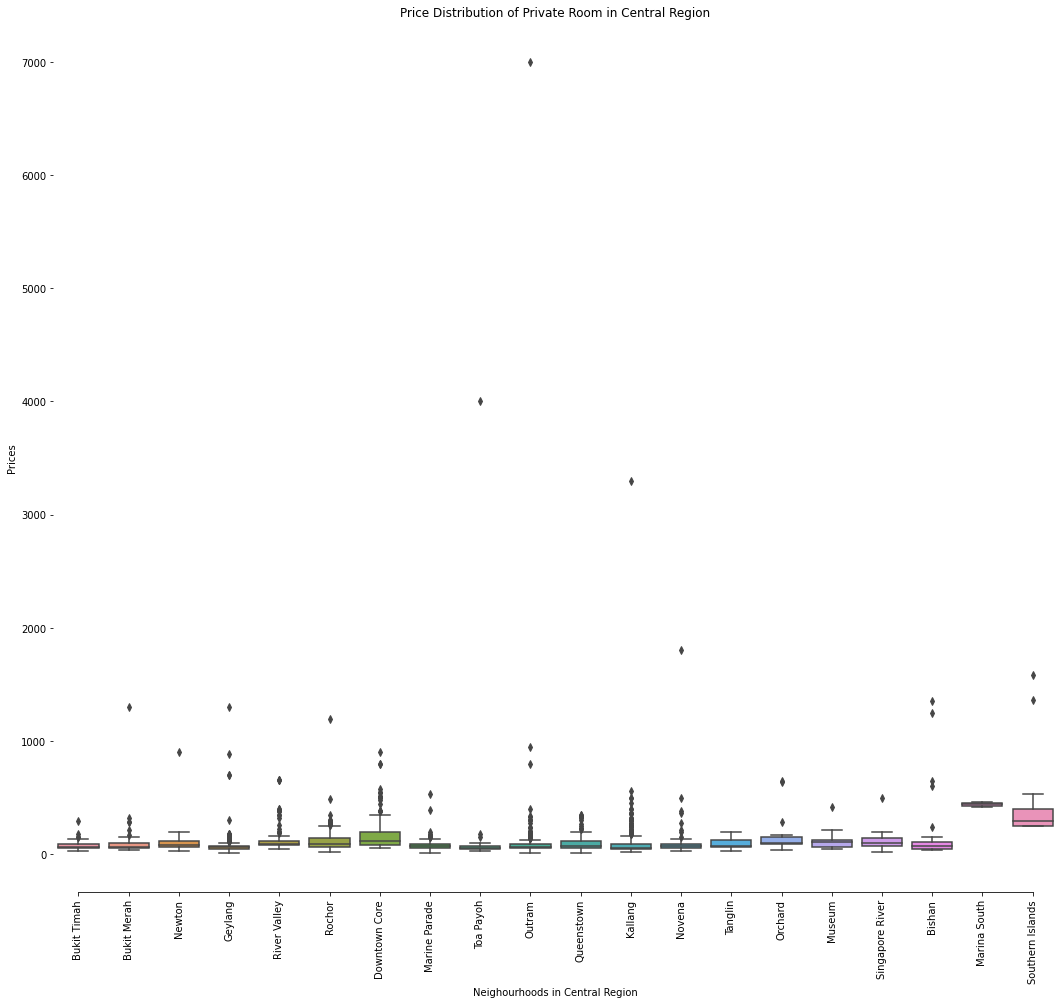

In [31]:
airbnb_central_pr = airbnb_central[airbnb_central.room_type == 'Private room']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_pr)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Private Room in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

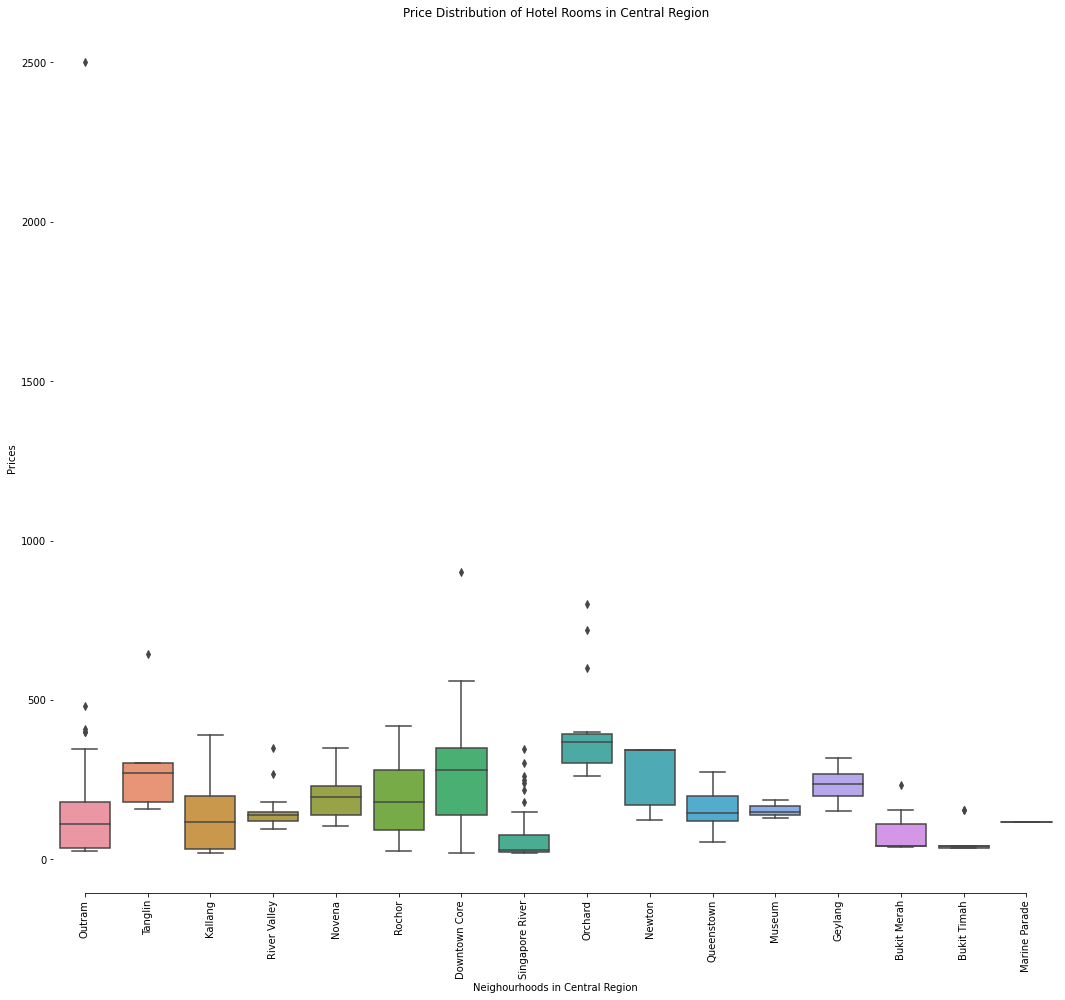

In [32]:
airbnb_central_hr = airbnb_central[airbnb_central.room_type == 'Hotel room']
f,ax = plt.subplots(figsize=(18,16))
sns.boxplot(y='price',x='neighbourhood',data=airbnb_central_hr)
ax.xaxis.grid(False)
ax.set(title='Price Distribution of Hotel Rooms in Central Region')
ax.set(ylabel='Prices')
ax.set(xlabel='Neighourhoods in Central Region')
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.show()

In [33]:
#Identify locations of Airbnb properties on the Singapore Map
map1 = folium.Map(location=[1.44255,103.79580],zoom_start=11)
marker_cluster = MarkerCluster().add_to(map1)
for i in range(len(central_locations_ehlist)):
  folium.Marker(central_locations_ehlist[i]).add_to(marker_cluster)
map1

#### From the marker cluster map, we can see that most of the properties by which the room types is the Entire Home/Apartment is located at the central area where most of the shopping centres are located such as Kallang , Bugis and Orchard

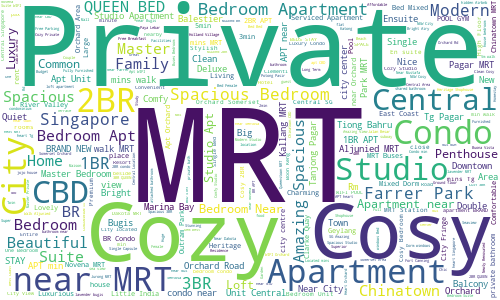

In [34]:
#wordcloud of names
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
stopwords  = set(STOPWORDS)
stopwords.update(["Room"]) #Add room to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in df_listings.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

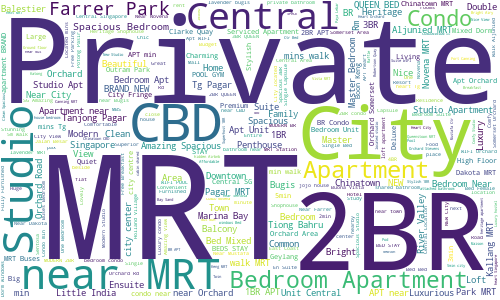

In [35]:
stopwords  = set(STOPWORDS)
stopwords.update(["Room","Cosy","Cozy"]) #Add room, cosy and cozy to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in airbnb_central.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

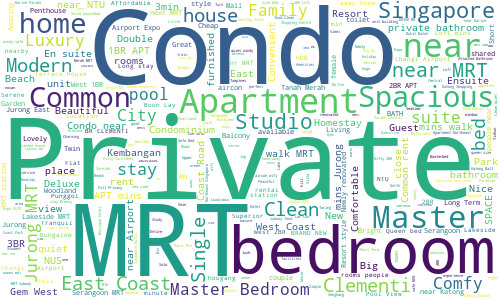

In [36]:
airbnb_noncentral = df_listings[df_listings.neighbourhood_group != 'Central Region']
stopwords  = set(STOPWORDS)
stopwords.update(["Room","Cosy","Cozy"]) #Add room, cosy and cozy to list of stopwords as it is commonly used term 
text = " ".join(str(x) for x in airbnb_noncentral.name)
wc = WordCloud(width=500, height=300,max_words = 300,contour_width = 2,contour_color = 'steelblue',stopwords = stopwords, background_color ='white').generate(text)
wc.to_image()

#### From the word cloud, the common terms used in promoting their Airbnb services focuses more on the location near the MRT and the comfort of the room or home apartment. Private rooms seems to the most publicized for this dataset

### For the ETL section we will impute missing values as well as enrich with additional features such as distance of location to the nearest train (MRT) station

In [37]:
fig = px.scatter_mapbox(airbnb_central_eh, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [38]:
fig = px.scatter_mapbox(airbnb_central_pr, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [39]:
fig = px.scatter_mapbox(airbnb_central_hr, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [40]:
fig = px.scatter_mapbox(airbnb_noncentral, lat="latitude", lon="longitude", hover_name="name", hover_data=["host_name", "room_type", "minimum_nights","price"], zoom=10, height=600,color="room_type", size="minimum_nights",
                  color_continuous_scale=px.colors.diverging, size_max=20)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Week 2: ETL and Feature Engineering

#### My next step will preparing the data to develop the predictive model. In addition, I will add an additional variable from another dataset to determine the distance of each Airbnb property to the nearest train station. In Singapore context, it is also known as the MRT (Mass Rapit Transit) and LRT (Light Rapid Transit)

### I will be using the MRT data from the link below 
https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv  . 

### Credits given to Hui Xiang Chua from Data Double Confirm. 

In [41]:
#Inspect the data again for any missing values
df_listings.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2927
reviews_per_month                 2927
calculated_host_listings_count       0
availability_365                     0
dtype: int64

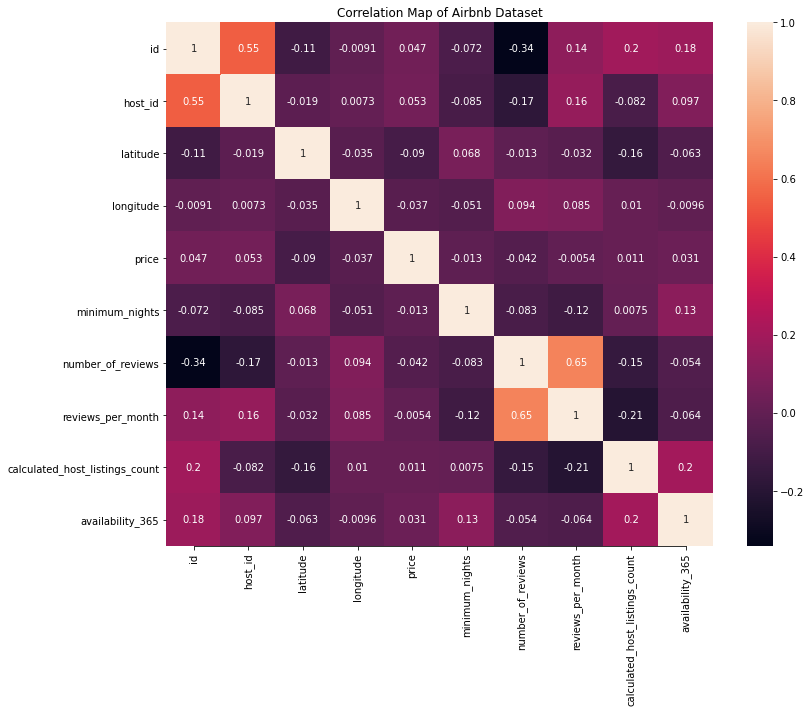

In [42]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

### Since number of reviews and reviews per month have a strong correlation with each other, we can choose to drop one of them. For this case, we will drop the review per month as there are missing values

In [0]:
#Drop the columns which are not required for the analysis and predictive model
df_listings.drop(['id','name','host_id','host_name','last_review','reviews_per_month'],axis=1,inplace=True)

In [44]:
df_listings.head()

neighbourhood_group  ... availability_365
0        North Region  ...              365
1      Central Region  ...              365
2        North Region  ...              365
3         East Region  ...              365
4         East Region  ...              365

[5 rows x 10 columns]

#### Import MRT dataset 

In [45]:
!wget https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv 

--2020-04-04 12:28:24--  https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/mrtsg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15533 (15K) [text/plain]
Saving to: ‘mrtsg.csv’

mrtsg.csv           100%[===================>]  15.17K  --.-KB/s    in 0.01s   

2020-04-04 12:28:24 (1.22 MB/s) - ‘mrtsg.csv’ saved [15533/15533]



In [46]:
mrt_data = pd.read_csv('mrtsg.csv')
mrt_data.head()

OBJECTID                STN_NAME STN_NO  ...  Latitude   Longitude   COLOR
0        12   ADMIRALTY MRT STATION   NS10  ...  1.440585  103.800998     RED
1        16    ALJUNIED MRT STATION    EW9  ...  1.316433  103.882893   GREEN
2        33  ANG MO KIO MRT STATION   NS16  ...  1.369933  103.849553     RED
3        81       BAKAU LRT STATION    SE3  ...  1.388093  103.905418  OTHERS
4        80     BANGKIT LRT STATION    BP9  ...  1.380018  103.772667  OTHERS

[5 rows x 8 columns]

In [0]:
#Import geopy distance calculator
from geopy.distance import geodesic

In [0]:
def nearest_distance(nb_row, mrt_lrt):
  """
  The following function calculates the distance 
  of each Airbnb property to the nearest MRT or LRT
  """
  pass
  nb_lat , nb_long = nb_row[['latitude','longitude']]
  min_distance = 9999.00
  for stn_lat , stn_lng in zip(mrt_data['Latitude'],mrt_data['Longitude']):
    distance = geodesic((nb_lat,nb_long),(stn_lat,stn_lng)).km
    if distance < min_distance:
      min_distance = distance 
  return min_distance

In [49]:
%%time
df_listings['distance_to_nearest_stn'] = df_listings.apply(nearest_distance, axis=1,mrt_lrt = mrt_data)

CPU times: user 4min 52s, sys: 23.3 ms, total: 4min 52s
Wall time: 4min 53s


In [50]:
df_listings.head()

neighbourhood_group neighbourhood  ...  availability_365  distance_to_nearest_stn
0        North Region     Woodlands  ...               365                 0.617939
1      Central Region   Bukit Timah  ...               365                 0.397868
2        North Region     Woodlands  ...               365                 0.524388
3         East Region      Tampines  ...               365                 0.486465
4         East Region      Tampines  ...               365                 0.479073

[5 rows x 11 columns]

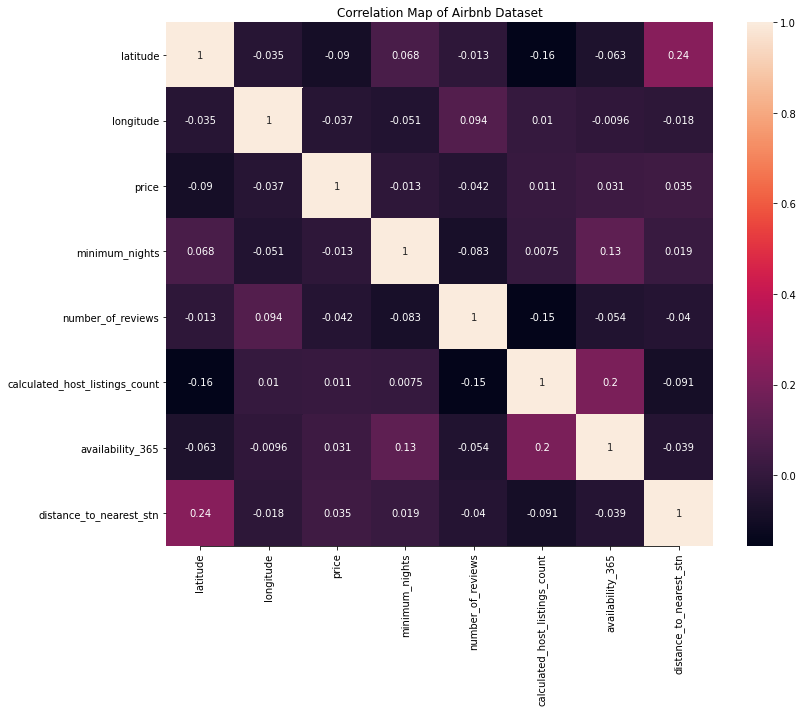

In [51]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [52]:
df_listings.describe()

latitude    longitude  ...  availability_365  distance_to_nearest_stn
count  8047.000000  8047.000000  ...       8047.000000              8047.000000
mean      1.313418   103.848927  ...        220.874115                 0.524526
std       0.030409     0.041647  ...        147.731172                 0.386795
min       1.243870   103.646560  ...          0.000000                 0.004443
25%       1.296025   103.838185  ...         75.000000                 0.266943
50%       1.311000   103.850310  ...        297.000000                 0.436837
75%       1.321465   103.867417  ...        363.000000                 0.661399
max       1.454590   103.973420  ...        365.000000                 7.932300

[8 rows x 8 columns]

In [53]:
#Remove outlier distance over 5km from nearest MRT/LRT
df_listings = df_listings[df_listings.distance_to_nearest_stn < 5]
df_listings.shape

(8046, 11)

In [54]:
#Filter out data by which minimum nights is more than 365 days
df_listings = df_listings[df_listings.minimum_nights <= 365]
df_listings.shape

(8041, 11)

In [55]:
#Remove null values of price for normalization
df_listings = df_listings[df_listings.price > 0]
df_listings.shape

(8040, 11)

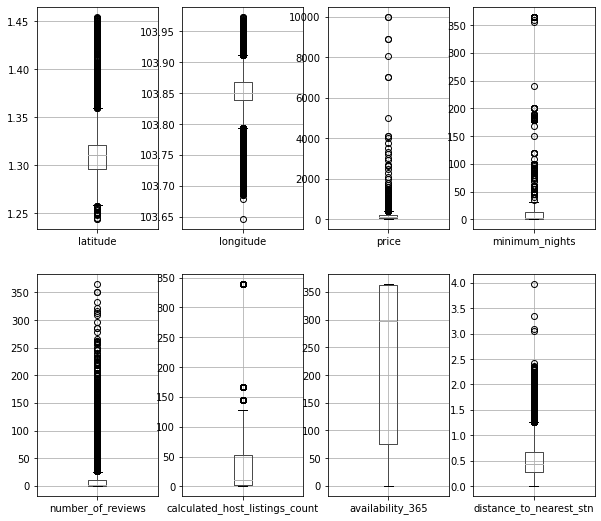

In [56]:
cols=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','distance_to_nearest_stn']
plt.figure(figsize=(10,9))
for i in range(1,9):
    
    plt.subplot(2,4,i)
    fig=df_listings.boxplot(column=cols[i-1])

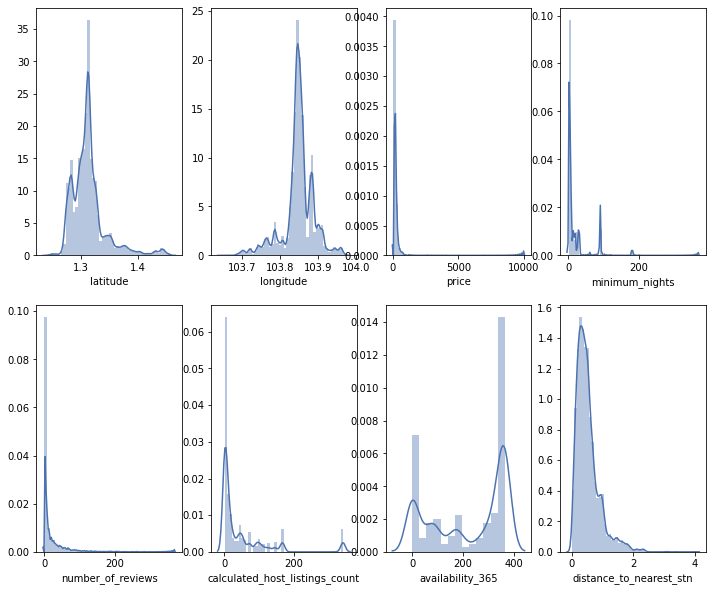

In [57]:
plt.figure(figsize=(12,10))
for j in range(1,9):
    plt.subplot(2,4,j)
    sns.distplot(df_listings[cols[j-1]])

In [58]:
#for latitude
std=np.std(df_listings['latitude'])
mean=np.mean(df_listings['latitude'])
median=np.median(df_listings['latitude'])
outliers=[]
for x in df_listings['latitude']:
    zscore=(x-mean)/std
    if zscore>abs(3):
        outliers.append(x)

len(outliers)

193

In [0]:
df_listings = df_listings.replace(outliers, median)

In [60]:
#for longitude
std=np.std(df_listings['longitude'])
mean=np.mean(df_listings['longitude'])
median=np.median(df_listings['longitude'])
outliers=[]
for x in df_listings['longitude']:
    zscore=(x-mean)/std
    if -3<zscore>3:
        outliers.append(x)

len(outliers)

0

### Encoding of categorical variables 

In [61]:
#Inspect the variables for room_type
df_listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [0]:
room_type_map = {'Private room' : 1, 'Entire home/apt': 2 , 'Shared room':3 ,'Hotel room' : 4}
df_listings['room_type'] = df_listings['room_type'].map(room_type_map)

In [63]:
df_listings.head()

neighbourhood_group neighbourhood  ...  availability_365  distance_to_nearest_stn
0        North Region     Woodlands  ...               365                 0.617939
1      Central Region   Bukit Timah  ...               365                 0.397868
2        North Region     Woodlands  ...               365                 0.524388
3         East Region      Tampines  ...               365                 0.486465
4         East Region      Tampines  ...               365                 0.479073

[5 rows x 11 columns]

In [64]:
df_listings['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Serangoon', 'Jurong West',
       'Rochor', 'Queenstown', 'Downtown Core', 'Marine Parade',
       'Pasir Ris', 'Toa Payoh', 'Outram', 'Punggol', 'Tanglin',
       'Hougang', 'Kallang', 'Novena', 'Bukit Panjang', 'Mandai',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Singapore River', 'Jurong East', 'Clementi',
       'Sengkang', 'Bishan', 'Central Water Catchment', 'Yishun',
       'Southern Islands', 'Sungei Kadut', 'Western Water Catchment',
       'Tuas', 'Pioneer', 'Marina South', 'Lim Chu Kang'], dtype=object)

In [65]:
len(df_listings['neighbourhood'].unique())

44

In [66]:
df_listings['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region',
       'North-East Region', 'West Region'], dtype=object)

In [0]:
#Label Encoding of Categorical Variables
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
df_listings['neighbourhood'] = le.fit_transform(df_listings['neighbourhood'])

In [0]:
le = LabelEncoder()
df_listings['neighbourhood_group'] = le.fit_transform(df_listings['neighbourhood_group'])

In [70]:
df_listings.head()

neighbourhood_group  ...  distance_to_nearest_stn
0                    2  ...                 0.617939
1                    0  ...                 0.397868
2                    2  ...                 0.524388
3                    1  ...                 0.486465
4                    1  ...                 0.479073

[5 rows x 11 columns]

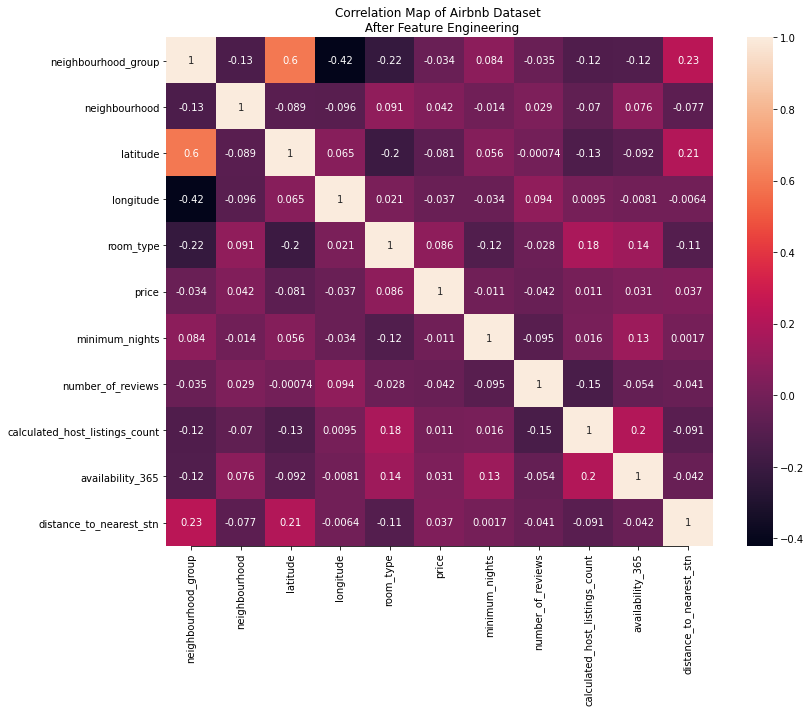

In [71]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset \n After Feature Engineering')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [72]:
#Check variables with min zero
df_listings.describe()

neighbourhood_group  ...  distance_to_nearest_stn
count          8040.000000  ...              8040.000000
mean              0.462687  ...                 0.523488
std               1.115698  ...                 0.377855
min               0.000000  ...                 0.004443
25%               0.000000  ...                 0.266876
50%               0.000000  ...                 0.436835
75%               0.000000  ...                 0.661146
max               4.000000  ...                 3.984738

[8 rows x 11 columns]

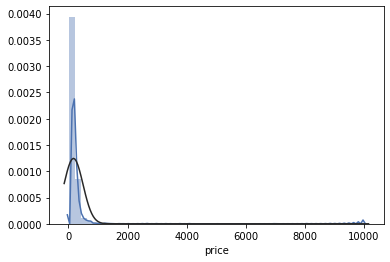

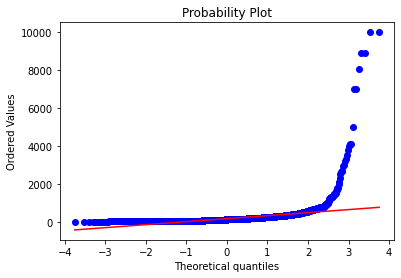

In [73]:
sns.distplot(df_listings['price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['price'],plot=plt)

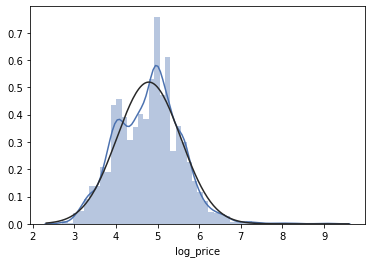

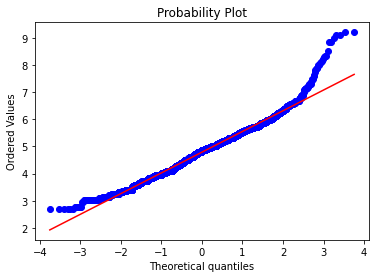

In [74]:
df_listings['log_price'] = np.log1p(df_listings['price'])
sns.distplot(df_listings['log_price'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['log_price'],plot=plt)

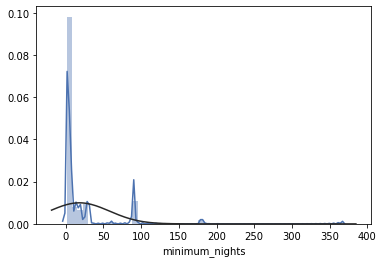

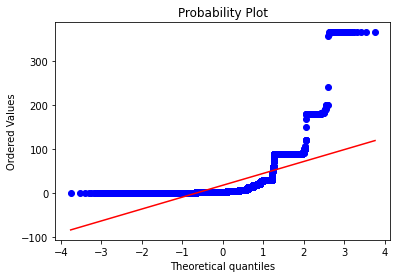

In [75]:
sns.distplot(df_listings['minimum_nights'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['minimum_nights'],plot=plt)

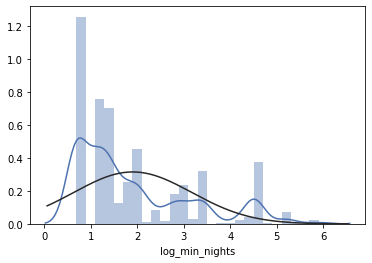

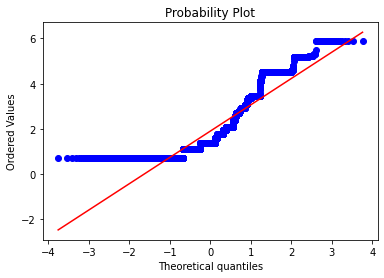

In [76]:
df_listings['log_min_nights'] = np.log1p(df_listings['minimum_nights'])
sns.distplot(df_listings['log_min_nights'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_listings['log_min_nights'],plot=plt)

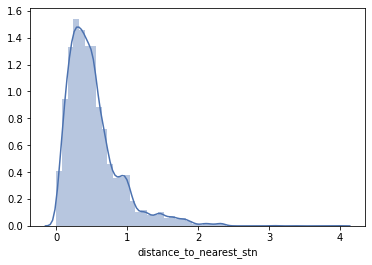

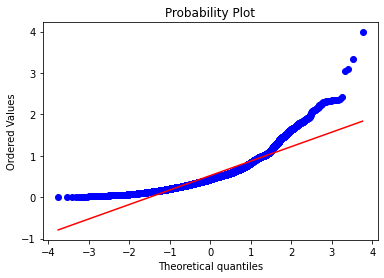

In [77]:
sns.distplot(df_listings['distance_to_nearest_stn'])
fig = plt.figure()
res = stats.probplot(df_listings['distance_to_nearest_stn'],plot=plt)

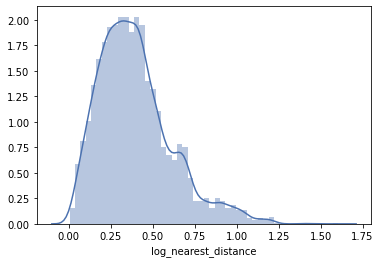

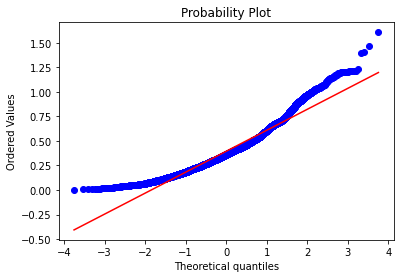

In [78]:
df_listings['log_nearest_distance'] = np.log1p(df_listings['distance_to_nearest_stn'])
sns.distplot(df_listings['log_nearest_distance'])
fig = plt.figure()
res = stats.probplot(df_listings['log_nearest_distance'],plot=plt)

In [79]:
df_listings.columns.tolist()

['neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'distance_to_nearest_stn',
 'log_price',
 'log_min_nights',
 'log_nearest_distance']

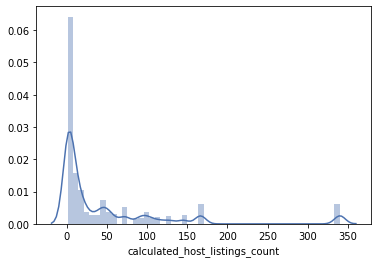

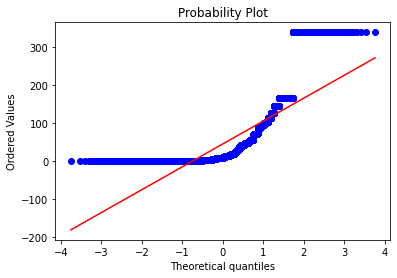

In [80]:
sns.distplot(df_listings['calculated_host_listings_count'])
fig = plt.figure()
res = stats.probplot(df_listings['calculated_host_listings_count'],plot=plt)

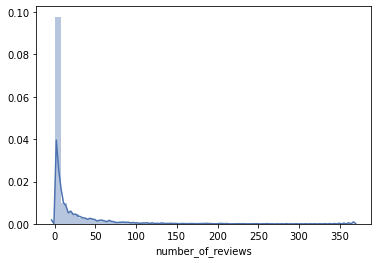

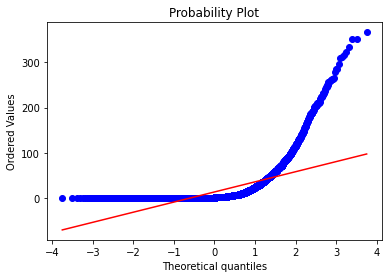

In [81]:
sns.distplot(df_listings['number_of_reviews'])
fig = plt.figure()
res = stats.probplot(df_listings['number_of_reviews'],plot=plt)

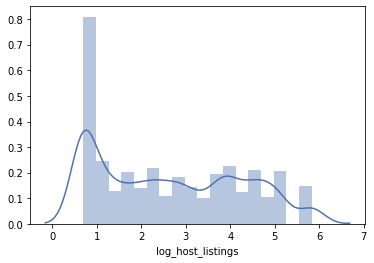

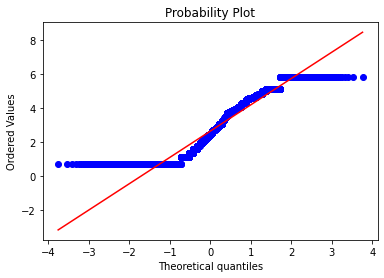

In [82]:
df_listings['log_host_listings'] = np.log1p(df_listings['calculated_host_listings_count'])
sns.distplot(df_listings['log_host_listings'])
fig = plt.figure()
res = stats.probplot(df_listings['log_host_listings'],plot=plt)

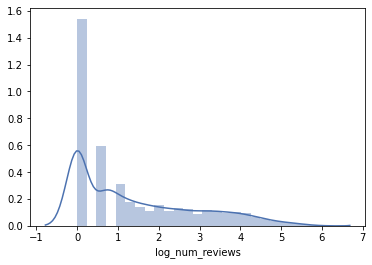

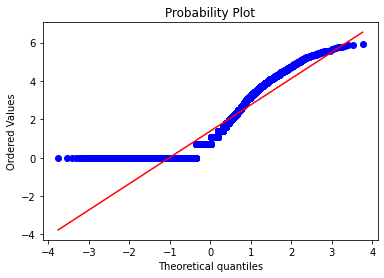

In [83]:
df_listings['log_num_reviews'] = np.log1p(df_listings['number_of_reviews'])
sns.distplot(df_listings['log_num_reviews'])
fig = plt.figure()
res = stats.probplot(df_listings['log_num_reviews'],plot=plt)

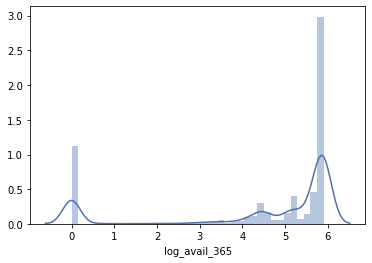

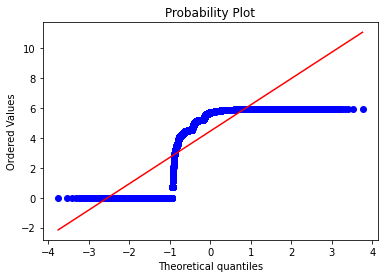

In [84]:
df_listings['log_avail_365'] = np.log1p(df_listings['availability_365'])
sns.distplot(df_listings['log_avail_365'])
fig = plt.figure()
res = stats.probplot(df_listings['log_avail_365'],plot=plt)

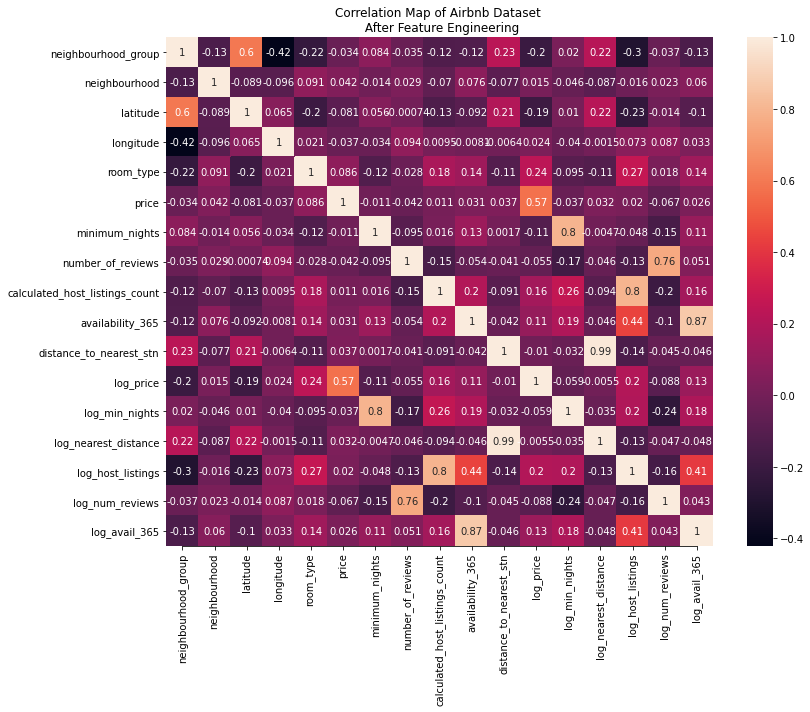

In [85]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_listings.corr(), annot=True)
ax.set(title='Correlation Map of Airbnb Dataset \n After Feature Engineering')
ax.xaxis.grid(False)
sns.despine(left=True,trim=True)
plt.tight_layout()
plt.show()

In [86]:
df_listings.describe()

neighbourhood_group  neighbourhood  ...  log_num_reviews  log_avail_365
count          8040.000000    8040.000000  ...      8040.000000    8040.000000
mean              0.462687      18.402861  ...         1.388463       4.452435
std               1.115698      10.316813  ...         1.482840       2.171390
min               0.000000       0.000000  ...         0.000000       0.000000
25%               0.000000      11.000000  ...         0.000000       4.330733
50%               0.000000      15.000000  ...         0.693147       5.697093
75%               0.000000      28.000000  ...         2.397895       5.897154
max               4.000000      43.000000  ...         5.905362       5.902633

[8 rows x 17 columns]

In [87]:
df_listings.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'distance_to_nearest_stn', 'log_price', 'log_min_nights',
       'log_nearest_distance', 'log_host_listings', 'log_num_reviews',
       'log_avail_365'],
      dtype='object')

In [0]:
X = df_listings[['neighbourhood','neighbourhood_group','room_type',
       'log_min_nights','log_num_reviews','log_avail_365',
       'log_host_listings',
       'log_nearest_distance']]
y = df_listings['log_price']

## Week 3: Training of model

##### Key features of model training processs

* <strong>  Cross Validation </strong> : Using a 5-fold cross validation
* <strong> On each run of cross validation fit 4 models </strong> : SVR , Random Forest , Ridge Regression and XG Boost



In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge , RidgeCV
from sklearn.svm import SVR
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

In [0]:
from sklearn.model_selection import KFold,cross_val_score  
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score , accuracy_score ,f1_score , explained_variance_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, RobustScaler

#### Split data into dependent and independent variables 

In [0]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Define the number of folds and the error metrics

In [0]:
kf = KFold(n_splits=5,random_state=None,shuffle=True)

In [0]:
def rmlse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

In [0]:
def rmsecv(model, X= X_train):
  rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
  return rmse

### Build the 4 models 

In [0]:
## SVR 
svr_model = SVR(kernel='rbf',C=0.5,degree=7)

In [0]:
## Random Forest Model
rf_model =  RandomForestRegressor(n_estimators=650,min_samples_split=5,max_depth=7,oob_score=False,random_state=42)

In [0]:
#Ridge Regressor
ridge_model = RidgeCV(alphas=[0.001,0.01,0.1,1.0,10.0,100.0],normalize=True,cv=kf)

In [0]:
## XG Boost Regressor
xgb_model = XGBRegressor(learning_rate=0.01,n_estimators=500,max_depth=8,objective='reg:squarederror',nthread=1,random_state=42)

In [0]:
## Light GBM Regressor 
lgb_model = LGBMRegressor(objective='regression',num_leaves=5,n_estimators=500,max_depth=5, learning_rate=0.3)

### Training of each model

In [100]:
scores = {}

score = rmsecv(svr_model)
print("svr: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['SVR'] = (score.mean(),score.std())

svr: 0.7212 (0.0319)


In [101]:
%%time
score = rmsecv(rf_model)
print("Random Forest: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['Random Forest'] = (score.mean(),score.std())

Random Forest: 0.5140 (0.0295)
CPU times: user 24.8 s, sys: 41.8 ms, total: 24.8 s
Wall time: 24.9 s


In [102]:
score = rmsecv(ridge_model)
print("Ridge Regression Model: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['Ridge Regression'] = (score.mean(),score.std())

Ridge Regression Model: 0.7354 (0.0174)


In [103]:
%%time
score = rmsecv(xgb_model)
print("XGB Model: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['XGBoost'] = (score.mean(),score.std())

XGB Model: 0.4986 (0.0246)
CPU times: user 13.6 s, sys: 133 ms, total: 13.7 s
Wall time: 13.8 s


In [104]:
%%time
score = rmsecv(lgb_model)
print("LGB Model: {:.4f} ({:.4f})".format(score.mean(),score.std()))
scores['LightGBM'] = (score.mean(),score.std())

LGB Model: 0.5083 (0.0112)
CPU times: user 857 ms, sys: 24 ms, total: 881 ms
Wall time: 891 ms


## Week 4: Fitting of Model and Evaluation 

In [105]:
print('SVR')
svr_model_reg = svr_model.fit(X_train,y_train)

SVR


In [106]:
y_pred_svr = svr_model_reg.predict(X_test)
error_airbnb_svr = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred_svr.flatten()})
error_airbnb_svr.head()

Actual Values  Predicted Values
0       7.167038          4.988623
1       4.875197          4.741004
2       4.983607          4.760265
3       4.875197          4.772454
4       5.017280          4.714313

In [107]:
rmlse_svr = rmlse(y_test,y_pred_svr)
mae_svr = mean_absolute_error(y_test,y_pred_svr)
r2_svr = r2_score(y_test,y_pred_svr)
print("The RMSLE of SVR model is: {:.4f}".format(rmlse_svr))
print("The MAE of SVR model is: {:.4f}".format(mae_svr))
print("The R2 score of SVR model is: {:.4f}".format(r2_svr))

The RMSLE of SVR model is: 0.6900
The MAE of SVR model is: 0.4929
The R2 score of SVR model is: 0.1590


In [108]:
print('Random Forest')
rf_model_reg = rf_model.fit(X_train, y_train)

Random Forest


In [109]:
y_pred_rf = rf_model_reg.predict(X_test)
error_airbnb_rf = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred_rf.flatten()})
error_airbnb_rf.head()

Actual Values  Predicted Values
0       7.167038          6.279970
1       4.875197          5.281252
2       4.983607          4.859066
3       4.875197          5.048807
4       5.017280          5.229702

In [110]:
rmlse_rf = rmlse(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print("The RMSLE of Random Forest model is: {:.4f}".format(rmlse_rf))
print("The MAE of Random Forest model is: {:.4f}".format(mae_rf))
print("The R2 score of Random Forest model is: {:.4f}".format(r2_rf))

The RMSLE of Random Forest model is: 0.4975
The MAE of Random Forest model is: 0.3585
The R2 score of Random Forest model is: 0.5629


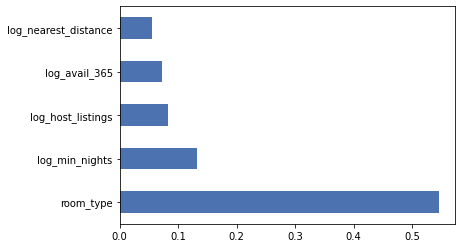

In [111]:
importance = pd.Series(np.abs(rf_model.feature_importances_))
importance.index = X.columns
#importance.sort_values(inplace=True, ascending=False)
importance.nlargest(5).plot(kind='barh')

In [112]:
print('Ridge Regression')
ridge_model_reg = ridge_model.fit(X_train, y_train)

Ridge Regression


In [113]:
y_pred_ridge = ridge_model_reg.predict(X_test)
error_airbnb_ridge = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred_ridge.flatten()})
error_airbnb_ridge.head()

Actual Values  Predicted Values
0       7.167038          5.016586
1       4.875197          4.604536
2       4.983607          5.001128
3       4.875197          4.776835
4       5.017280          4.700090

In [114]:
rmlse_rd = rmlse(y_test,y_pred_ridge)
mae_rd = mean_absolute_error(y_test,y_pred_ridge)
r2_rd = r2_score(y_test,y_pred_ridge)
print("The RMSLE of Ridge Regression model is: {:.4f}".format(rmlse_rd))
print("The MAE of Ridge Regression model is: {:.4f}".format(mae_rd))
print("The R2 score of Ridge Regression model is: {:.4f}".format(r2_rd))

The RMSLE of Ridge Regression model is: 0.7043
The MAE of Ridge Regression model is: 0.5263
The R2 score of Ridge Regression model is: 0.1239


In [115]:
print('XG Boost')
xgb_model_reg = xgb_model.fit(X_train, y_train)

XG Boost


In [116]:
y_pred_xgb = xgb_model_reg.predict(X_test)
error_airbnb_xgb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred_xgb.flatten()})
error_airbnb_xgb.head()

Actual Values  Predicted Values
0       7.167038          7.464334
1       4.875197          5.248119
2       4.983607          4.947768
3       4.875197          5.035372
4       5.017280          5.155178

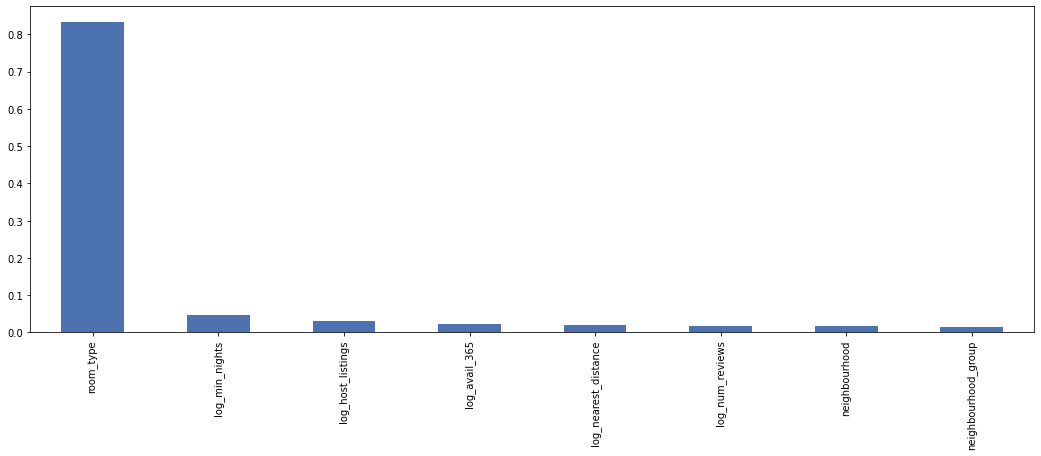

In [117]:
importance = pd.Series(np.abs(xgb_model.feature_importances_))
importance.index = X.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

In [118]:
rmlse_xgb = rmlse(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
r2_xgb = r2_score(y_test,y_pred_xgb)
print("The RMSLE of XG Boost model is: {:.4f}".format(rmlse_xgb))
print("The MAE of XG Boost model is: {:.4f}".format(mae_xgb))
print("The R2 score of XG Boost model is: {:.4f}".format(r2_xgb))

The RMSLE of XG Boost model is: 0.4754
The MAE of XG Boost model is: 0.3335
The R2 score of XG Boost model is: 0.6009


In [0]:
from sklearn.linear_model import LinearRegression

In [120]:
%%time
print('LG Boosting')
lgb_model_reg = lgb_model.fit(X_train, y_train)

LG Boosting
CPU times: user 171 ms, sys: 9 ms, total: 180 ms
Wall time: 185 ms


In [121]:
y_pred_lgb = lgb_model_reg.predict(X_test)
error_airbnb_lgb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred_lgb.flatten()})
error_airbnb_lgb.head()

Actual Values  Predicted Values
0       7.167038          7.357839
1       4.875197          5.285902
2       4.983607          5.096585
3       4.875197          4.754124
4       5.017280          5.070594

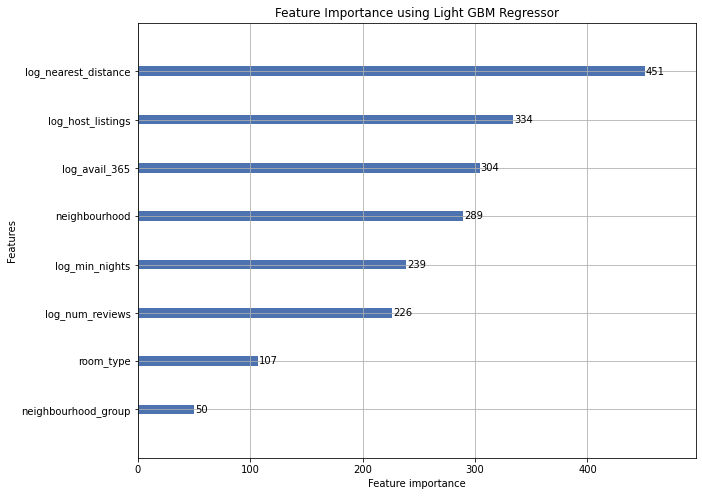

In [122]:
lgb.plot_importance(lgb_model,figsize=(10,8),title='Feature Importance using Light GBM Regressor',importance_type='split')

In [123]:
rmlse_lgb = rmlse(y_test,y_pred_lgb)
mae_lgb = mean_absolute_error(y_test,y_pred_lgb)
r2_lgb = r2_score(y_test,y_pred_lgb)
print("The RMSLE of Light GBM model is: {:.4f}".format(rmlse_lgb))
print("The MAE of Light GBM model is: {:.4f}".format(mae_lgb))
print("The R2 score of Light GBM model is: {:.4f}".format(r2_lgb))

The RMSLE of Light GBM model is: 0.4750
The MAE of Light GBM model is: 0.3375
The R2 score of Light GBM model is: 0.6016


In [0]:
#Ordinary Least Squares Regression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
stack_model  = StackingCVRegressor(regressors=(lgb_model,lr,xgb_model),meta_regressor= lgb_model,use_features_in_secondary=True)

In [125]:
%%time
stack_model.fit(X_train.values,y_train.ravel())

CPU times: user 18.2 s, sys: 399 ms, total: 18.6 s
Wall time: 18.3 s


StackingCVRegressor(cv=5,
                    meta_regressor=LGBMRegressor(boosting_type='gbdt',
                                                 class_weight=None,
                                                 colsample_bytree=1.0,
                                                 importance_type='split',
                                                 learning_rate=0.3, max_depth=5,
                                                 min_child_samples=20,
                                                 min_child_weight=0.001,
                                                 min_split_gain=0.0,
                                                 n_estimators=500, n_jobs=-1,
                                                 num_leaves=5,
                                                 objective='regression',
                                                 random_state=None,
                                                 reg_alpha=0.0, reg_lambda=0.0,
                                  

#### The prediction model constructed showed that the room type is the most import features in determining the price of the Airbnb model. 

In [126]:
%%time
y_pred_stack = stack_model.predict(X_test.values)

CPU times: user 236 ms, sys: 99.8 ms, total: 336 ms
Wall time: 217 ms


In [127]:
rmlse_stack = rmlse(y_test,y_pred_stack)
mae_stack = mean_absolute_error(y_test,y_pred_stack)
r2_stack = r2_score(y_test,y_pred_stack)
print("The RMSLE of Stack model is: {:.4f}".format(rmlse_stack))
print("The MAE of Stack model is: {:.4f}".format(mae_stack))
print("The R2 score of Stack model is: {:.4f}".format(r2_stack))

The RMSLE of Stack model is: 0.4814
The MAE of Stack model is: 0.3384
The R2 score of Stack model is: 0.5907


## Apply ANN (Artificial Neural Network) for prediction

In [0]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [129]:
#import deep learning libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD , RMSprop
from keras import losses

Using TensorFlow backend.


In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0-rc2


In [131]:
df_listings.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'distance_to_nearest_stn', 'log_price', 'log_min_nights',
       'log_nearest_distance', 'log_host_listings', 'log_num_reviews',
       'log_avail_365'],
      dtype='object')

In [0]:
mxscale = MinMaxScaler(feature_range=(0,1))
X_train = mxscale.fit_transform(X_train)
X_test = mxscale.fit_transform(X_test)

In [0]:
def build_model():
  ann_model = keras.Sequential([
    layers.Dense(128, activation='relu',input_shape=(8,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='relu')
  ])

  optimizer = tf.keras.optimizers.Adam(0.01)

  ann_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['accuracy'])
  return ann_model

In [137]:
ann_model = build_model()
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [138]:
%%time
epochs = 30

history = ann_model.fit(
  X_train, y_train,
  epochs=epochs, validation_split = 0.2, verbose=0, batch_size=64)


CPU times: user 4.71 s, sys: 303 ms, total: 5.02 s
Wall time: 3.92 s


In [139]:
%%time 
ann_predict = ann_model.predict(X_test)

CPU times: user 188 ms, sys: 14.1 ms, total: 203 ms
Wall time: 195 ms


In [140]:
error_airbnb_ann = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': ann_predict.flatten()})
error_airbnb_ann.head()

Actual Values  Predicted Values
0       7.167038          6.384296
1       4.875197          5.238692
2       4.983607          4.941205
3       4.875197          5.010129
4       5.017280          5.094563

In [141]:
rmlse_ann = rmlse(y_test,ann_predict)
mae_ann = mean_absolute_error(y_test,ann_predict)
r2_ann = r2_score(y_test,ann_predict)
print("The RMSLE of ANN model is: {:.4f}".format(rmlse_ann))
print("The MAE of ANN model is: {:.4f}".format(mae_ann))
print("The R2 score of ANN model is: {:.4f}".format(r2_ann))

The RMSLE of ANN model is: 0.5385
The MAE of ANN model is: 0.4007
The R2 score of ANN model is: 0.4879


In [0]:
R2_scores = {'Model':['SVR','Random Forest','Ridge Regression','XG Boost','Light GBM','Stack Model','ANN'],
           'R2 Scores':[r2_svr,r2_rf,r2_rd,r2_xgb,r2_lgb,r2_stack,r2_ann]}

Model_eval = pd.DataFrame.from_dict(R2_scores)

In [143]:
Model_eval.head()

Model  R2 Scores
0               SVR   0.159017
1     Random Forest   0.562866
2  Ridge Regression   0.123920
3          XG Boost   0.600873
4         Light GBM   0.601550

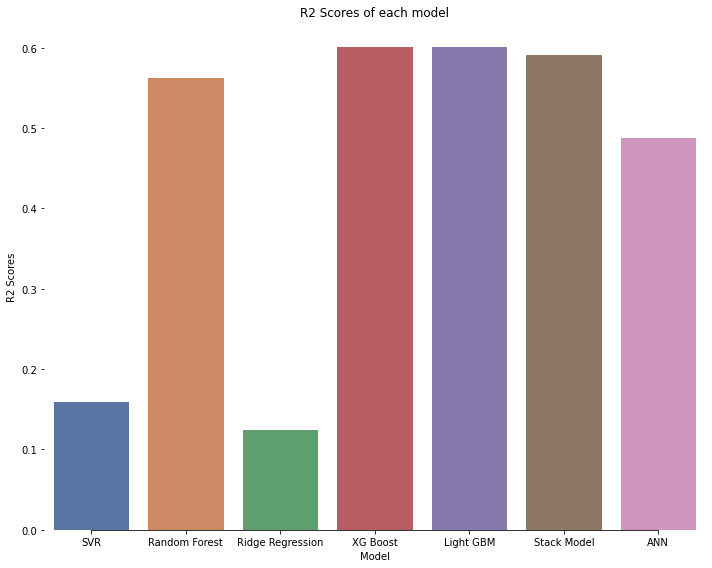

In [144]:
f,ax = plt.subplots(figsize=(10,8))
ax.xaxis.grid(False)
sns.barplot(Model_eval['Model'],Model_eval['R2 Scores'])
sns.despine(trim=True,left=True)
sns.set_style('white')
sns.set_palette('deep')
ax.set(title='R2 Scores of each model')
plt.tight_layout()
plt.show()